In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [41]:
train=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",names=['parents','has_nurs','form','children','housing','finance','social','health','y'])


In [42]:
train.head(100)

parents has_nurs      form children     housing     finance         social  \
0    usual   proper  complete        1  convenient  convenient        nonprob   
1    usual   proper  complete        1  convenient  convenient        nonprob   
2    usual   proper  complete        1  convenient  convenient        nonprob   
3    usual   proper  complete        1  convenient  convenient  slightly_prob   
4    usual   proper  complete        1  convenient  convenient  slightly_prob   
5    usual   proper  complete        1  convenient  convenient  slightly_prob   
6    usual   proper  complete        1  convenient  convenient    problematic   
7    usual   proper  complete        1  convenient  convenient    problematic   
8    usual   proper  complete        1  convenient  convenient    problematic   
9    usual   proper  complete        1  convenient      inconv        nonprob   
10   usual   proper  complete        1  convenient      inconv        nonprob   
11   usual   proper  complete        1  convenient      inconv        nonprob   
12   usual   proper  complete        1  convenient      inconv  slightly_prob   
13   usual   proper  complete        1  convenient      inconv  slightly_prob   
14   usual   proper  complete        1  convenient      inconv  slightly_prob   
15   usual   proper  complete        1  convenient      inconv    problematic   
16   usual   proper  complete        1  convenient      inconv    problematic   
17   usual   proper  complete        1  convenient      inconv    problematic   
18   usual   proper  complete        1   less_conv  convenient        nonprob   
19   usual   proper  complete        1   less_conv  convenient        nonprob   
20   usual   proper  complete        1   less_conv  convenient        nonprob   
21   usual   proper  complete        1   less_conv  convenient  slightly_prob   
22   usual   proper  complete        1   less_conv  convenient  slightly_prob   
23   usual   proper  complete        1   less_conv  convenient  slightly_prob   
24   usual   proper  complete        1   less_conv  convenient    problematic   
25   usual   proper  complete        1   less_conv  convenient    problematic   
26   usual   proper  complete        1   less_conv  convenient    problematic   
27   usual   proper  complete        1   less_conv      inconv        nonprob   
28   usual   proper  complete        1   less_conv      inconv        nonprob   
29   usual   proper  complete        1   less_conv      inconv        nonprob   
..     ...      ...       ...      ...         ...         ...            ...   
70   usual   proper  complete        2  convenient      inconv    problematic   
71   usual   proper  complete        2  convenient      inconv    problematic   
72   usual   proper  complete        2   less_conv  convenient        nonprob   
73   usual   proper  complete        2   less_conv  convenient        nonprob   
74   usual   proper  complete        2   less_conv  convenient        nonprob   
75   usual   proper  complete        2   less_conv  convenient  slightly_prob   
76   usual   proper  complete        2   less_conv  convenient  slightly_prob   
77   usual   proper  complete        2   less_conv  convenient  slightly_prob   
78   usual   proper  complete        2   less_conv  convenient    problematic   
79   usual   proper  complete        2   less_conv  convenient    problematic   
80   usual   proper  complete        2   less_conv  convenient    problematic   
81   usual   proper  complete        2   less_conv      inconv        nonprob   
82   usual   proper  complete        2   less_conv      inconv        nonprob   
83   usual   proper  complete        2   less_conv      inconv        nonprob   
84   usual   proper  complete        2   less_conv      inconv  slightly_prob   
85   usual   proper  complete        2   less_conv      inconv  slightly_prob   
86   usual   proper  complete        2   less_conv      inconv  slightly_prob   
87   usual   proper  complete     

In [43]:
train.isnull().sum()

parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
y           0
dtype: int64

In [4]:
def countplots(dataset):
    dataset["y"] = pd.Categorical(dataset["y"])
    sns.countplot(x="y", data=dataset)
    plt.xlabel("result")
    plt.show()

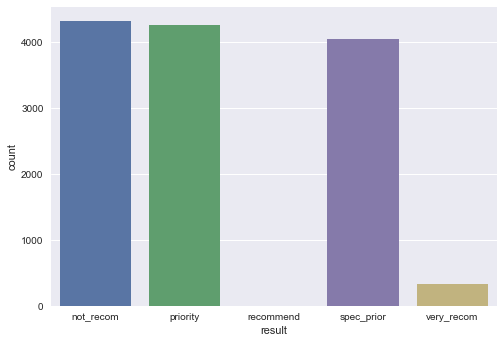

In [5]:
countplots(train)

In [6]:
parent_mapping = {
           'usual': [0,0],
           'pretentious': [1,0],
           'great_pret': [1,1]}

train['parents'] = train['parents'].apply(lambda x: parent_mapping[x])

In [7]:
has_nurs_mapping = {
           'very_crit': [0,0,0,0],
           'critical': [1,0,0,0],
           'improper': [1,1,0,0],
            'less_proper':[1,1,1,0],
            'proper':[1,1,1,1]
}
train['has_nurs'] = train['has_nurs'].apply(lambda x: has_nurs_mapping[x])

In [8]:
form_mapping = {
           'foster': [0,0,0],
           'incomplete': [1,0,0],
           'completed': [1,1,0],
            'complete':[1,1,1]
}
train['form'] = train['form'].apply(lambda x: form_mapping[x])

In [9]:
children_mapping = {
           '1':1,
           '2': 2,
           '3': 3,
           'more':4
}
train['children'] = train['children'].apply(lambda x: children_mapping[x])

In [10]:
housing_mapping = {
           'critical': [0,0],
           'less_conv': [1,0],
           'convenient': [1,1]}

train['housing'] = train['housing'].apply(lambda x: housing_mapping[x])

In [11]:
finance_mapping = {
           'convenient': 1,
           'inconv': 0
           }

train['finance'] = train['finance'].apply(lambda x: finance_mapping[x])

In [12]:
social_mapping = {
           'problematic': [0,0],
           'slightly_prob': [1,0],
            'nonprob':[1,1]
           }
train['social'] = train['social'].apply(lambda x: social_mapping[x])

In [13]:
health_mapping = {
           'not_recom': [0,0],
           'priority': [1,0],
            'recommended':[1,1]
           }
train['health'] = train['health'].apply(lambda x: health_mapping[x])

In [14]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
train['y'] = class_le.fit_transform(train['y'].values)

In [15]:
train.head(5)

parents      has_nurs       form  children housing  finance  social  health  \
0  [0, 0]  [1, 1, 1, 1]  [1, 1, 1]         1  [1, 1]        1  [1, 1]  [1, 1]   
1  [0, 0]  [1, 1, 1, 1]  [1, 1, 1]         1  [1, 1]        1  [1, 1]  [1, 0]   
2  [0, 0]  [1, 1, 1, 1]  [1, 1, 1]         1  [1, 1]        1  [1, 1]  [0, 0]   
3  [0, 0]  [1, 1, 1, 1]  [1, 1, 1]         1  [1, 1]        1  [1, 0]  [1, 1]   
4  [0, 0]  [1, 1, 1, 1]  [1, 1, 1]         1  [1, 1]        1  [1, 0]  [1, 0]   

   y  
0  2  
1  1  
2  0  
3  2  
4  1

In [16]:
parents= pd.DataFrame(train.parents.tolist(),columns=['parents_1','parents_2'] )
train = train.drop('parents',axis=1)
train=pd.concat([train,parents ], axis=1)


In [17]:
has_nurs= pd.DataFrame(train.has_nurs.tolist(),columns=['has_nurs_1','has_nurs_2','has_nurs_3','has_nurs_4'] )
train = train.drop('has_nurs',axis=1)
train=pd.concat([train,has_nurs], axis=1)

In [18]:
form= pd.DataFrame(train.form.tolist(),columns=['form_1','form_2','form_3'] )
train = train.drop('form',axis=1)
train=pd.concat([train,form ], axis=1)

In [19]:
housing= pd.DataFrame(train.housing.tolist(),columns=['housing_1','housing_2'] )
train = train.drop('housing',axis=1)
train=pd.concat([train,housing ], axis=1)

In [20]:
social= pd.DataFrame(train.social.tolist(),columns=['social_1','social_2'] )
train = train.drop('social',axis=1)
train=pd.concat([train,social ], axis=1)

In [21]:
health= pd.DataFrame(train.health.tolist(),columns=['health_1','health_2'] )
train = train.drop('health',axis=1)
train=pd.concat([train,health], axis=1)

In [22]:
train.head(5)

children  finance  y  parents_1  parents_2  has_nurs_1  has_nurs_2  \
0         1        1  2          0          0           1           1   
1         1        1  1          0          0           1           1   
2         1        1  0          0          0           1           1   
3         1        1  2          0          0           1           1   
4         1        1  1          0          0           1           1   

   has_nurs_3  has_nurs_4  form_1  form_2  form_3  housing_1  housing_2  \
0           1           1       1       1       1          1          1   
1           1           1       1       1       1          1          1   
2           1           1       1       1       1          1          1   
3           1           1       1       1       1          1          1   
4           1           1       1       1       1          1          1   

   social_1  social_2  health_1  health_2  
0         1         1         1         1  
1         1         1         1         0  
2         1         1         0         0  
3         1         0         1         1  
4         1         0         1         0

In [23]:
train.isnull().sum()

children      0
finance       0
y             0
parents_1     0
parents_2     0
has_nurs_1    0
has_nurs_2    0
has_nurs_3    0
has_nurs_4    0
form_1        0
form_2        0
form_3        0
housing_1     0
housing_2     0
social_1      0
social_2      0
health_1      0
health_2      0
dtype: int64

In [24]:
features=train.drop("y",axis=1)
outcomes=train["y"].values
features.head(5)

children  finance  parents_1  parents_2  has_nurs_1  has_nurs_2  \
0         1        1          0          0           1           1   
1         1        1          0          0           1           1   
2         1        1          0          0           1           1   
3         1        1          0          0           1           1   
4         1        1          0          0           1           1   

   has_nurs_3  has_nurs_4  form_1  form_2  form_3  housing_1  housing_2  \
0           1           1       1       1       1          1          1   
1           1           1       1       1       1          1          1   
2           1           1       1       1       1          1          1   
3           1           1       1       1       1          1          1   
4           1           1       1       1       1          1          1   

   social_1  social_2  health_1  health_2  
0         1         1         1         1  
1         1         1         1         0  
2         1         1         0         0  
3         1         0         1         1  
4         1         0         1         0

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, outcomes, test_size=0.25, random_state=10)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [27]:
model=RandomForestClassifier(n_estimators=5)
kfold = KFold(n_splits=10, random_state=0)
cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
results=["Ranom Forest",cv_result.mean(),cv_result.std()]

print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[0] , results[1] * 100, results[2] * 100))



Ranom Forest         97.48 (+/-) 0.49 


In [273]:
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
paramaters = [
             {'n_estimators' : [100, 200, 300, 500, 1000], 
              'max_features' : ['auto','log2',None],
              'max_depth':[3,4,5],
              'bootstrap':[True,False]
             }                                       
             ]
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train,Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )



/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


('Best accuracy : ', 0.8965020576131687)
('Best parameters :', {'max_features': 'auto', 'n_estimators': 500, 'bootstrap': True, 'max_depth': 5})


In [28]:
final_model = RandomForestClassifier(n_estimators=500,max_features='auto',bootstrap=True,oob_score=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)

[[1078    0    0    0    0]
 [   0  908    0  152    0]
 [   0    1    0    0    0]
 [   0   83    0  932    0]
 [   0   86    0    0    0]]
90.0617283951
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.84      0.86      0.85      1060
          2       0.00      0.00      0.00         1
          3       0.86      0.92      0.89      1015
          4       0.00      0.00      0.00        86

avg / total       0.88      0.90      0.89      3240



/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
final_model = RandomForestClassifier(n_estimators=1,max_features=None,bootstrap=False,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[1078    0    0    0    0]
 [   0  892    0  168    0]
 [   0    1    0    0    0]
 [   0  125    0  890    0]
 [   0   86    0    0    0]]
88.2716049383
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.81      0.84      0.82      1060
          2       0.00      0.00      0.00         1
          3       0.84      0.88      0.86      1015
          4       0.00      0.00      0.00        86

avg / total       0.86      0.88      0.87      3240



In [31]:
final_model = RandomForestClassifier(n_estimators=500,max_features=None,bootstrap=True,max_depth=5)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)




[[1078    0    0    0    0]
 [   0  892    0  168    0]
 [   0    1    0    0    0]
 [   0  125    0  890    0]
 [   0   86    0    0    0]]
88.2716049383
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.81      0.84      0.82      1060
          2       0.00      0.00      0.00         1
          3       0.84      0.88      0.86      1015
          4       0.00      0.00      0.00        86

avg / total       0.86      0.88      0.87      3240



# Random forest by xgboost

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model=XGBClassifier(num_boost_round=1,subsample=0.632)

paramaters = {
    'max_depth': [2, 3,4,5],
    'n_estimators':  [100,300,500,1000],
    'colsample_bytree':[np.log2(len(X_train.columns))/len(X_train.columns),
                        np.sqrt(len(X_train.columns))/len(X_train.columns)]
}
grid_search = GridSearchCV(estimator = model, 
                           param_grid = paramaters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, Y_train)
best_accuracy = grid_search.best_score_ 
best_parameters = grid_search.best_params_  

print('Best accuracy : ', grid_search.best_score_)
print('Best parameters :', grid_search.best_params_  )

/Users/bruce/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


('Best accuracy : ', 0.99897119341563789)
('Best parameters :', {'n_estimators': 1000, 'colsample_bytree': 0.24043899066178465, 'max_depth': 5})


In [33]:
final_model = XGBClassifier(n_estimators=1000,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=0.24043899066178465)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[1078    0    0    0    0]
 [   0 1060    0    0    0]
 [   0    0    0    0    1]
 [   0    1    0 1014    0]
 [   0    1    0    0   85]]
99.9074074074
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       1.00      1.00      1.00      1060
          2       0.00      0.00      0.00         1
          3       1.00      1.00      1.00      1015
          4       0.99      0.99      0.99        86

avg / total       1.00      1.00      1.00      3240



# Decision tree by xgboost

In [34]:
final_model = XGBClassifier(n_estimators=1,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[1078    0    0    0    0]
 [   0  892    0  168    0]
 [   0    1    0    0    0]
 [   0  125    0  890    0]
 [   0   86    0    0    0]]
88.2716049383
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.81      0.84      0.82      1060
          2       0.00      0.00      0.00         1
          3       0.84      0.88      0.86      1015
          4       0.00      0.00      0.00        86

avg / total       0.86      0.88      0.87      3240



# bagged tree 

In [35]:
final_model = XGBClassifier(n_estimators=100,num_boost_round=1,max_depth=5,subsample=0.632,colsample_bytree=1)
final_model.fit(X_train.values, Y_train.astype(int))
y_pred = final_model.predict(X_test.values)


from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred)
print(report)



[[1078    0    0    0    0]
 [   0 1060    0    0    0]
 [   0    0    0    0    1]
 [   0    0    0 1015    0]
 [   0    0    0    0   86]]
99.9691358025
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       1.00      1.00      1.00      1060
          2       0.00      0.00      0.00         1
          3       1.00      1.00      1.00      1015
          4       0.99      1.00      0.99        86

avg / total       1.00      1.00      1.00      3240



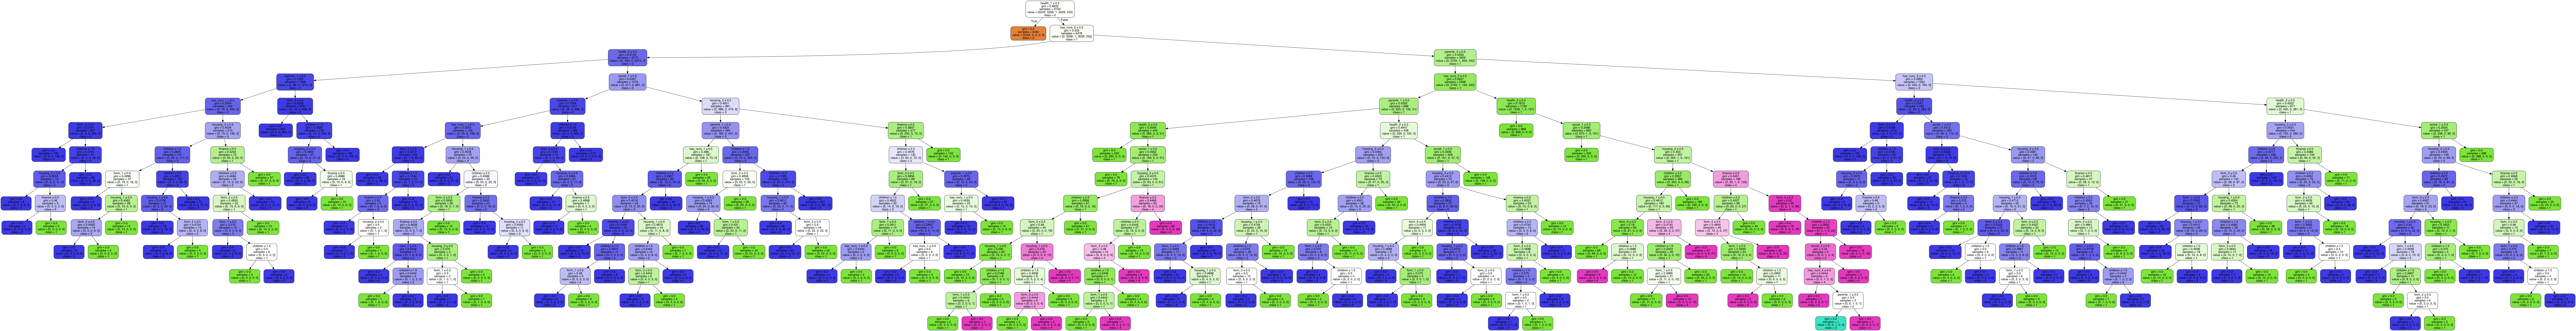

In [302]:
from graphviz import Digraph
import pydotplus
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                         class_names=['0','1','2','3','4'],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 


In [284]:
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test, y_pred)
print(cf)
print(accuracy_score(Y_test, y_pred) * 100) 

#Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test, y_pred)
print(report)

[[1078    0    0    0    0]
 [   0 1056    0    4    0]
 [   0    0    0    0    1]
 [   0    8    0 1007    0]
 [   0    0    0    0   86]]
99.5987654321
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.99      1.00      0.99      1060
          2       0.00      0.00      0.00         1
          3       1.00      0.99      0.99      1015
          4       0.99      1.00      0.99        86

avg / total       1.00      1.00      1.00      3240



In [29]:
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Activation, Dropout,Input
from keras import optimizers

In [286]:
m = Sequential()
m.add(Dense(128, activation='sigmoid', input_shape=(X_train.shape[1],)))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(128, activation='sigmoid'))
m.add(Dropout(0.5))
m.add(Dense(len(np.unique(Y_train)), activation='softmax'))
    
m.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [287]:
m.fit(
    # Feature matrix
    X_train.values, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=256, 
)

Train on 8748 samples, validate on 972 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 1.17268, saving model to best.model
0s - loss: 1.4111 - acc: 0.3178 - val_loss: 1.1727 - val_acc: 0.3169
Epoch 2/200
Epoch 00001: val_loss improved from 1.17268 to 1.16947, saving model to best.model
0s - loss: 1.2789 - acc: 0.3269 - val_loss: 1.1695 - val_acc: 0.3364
Epoch 3/200
Epoch 00002: val_loss improved from 1.16947 to 1.16298, saving model to best.model
0s - loss: 1.2384 - acc: 0.3382 - val_loss: 1.1630 - val_acc: 0.3364
Epoch 4/200
Epoch 00003: val_loss improved from 1.16298 to 1.15359, saving model to best.model
0s - loss: 1.2184 - acc: 0.3506 - val_loss: 1.1536 - val_acc: 0.4115
Epoch 5/200
Epoch 00004: val_loss improved from 1.15359 to 1.13167, saving model to best.model
0s - loss: 1.1931 - acc: 0.3727 - val_loss: 1.1317 - val_acc: 0.5576
Epoch 6/200
Epoch 00005: val_loss improved from 1.13167 to 1.06731, saving model to best.model
0s - loss: 1.1595 - acc: 0.4201 - val_loss

In [288]:
m.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in m.predict(X_test.values).argmax(axis=1)]

In [305]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1078    0    0    0    0]
 [   0 1008    0   40   12]
 [   0    0    0    0    1]
 [   0   34    0  981    0]
 [   0   12    0    0   74]]
96.9444444444
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       0.96      0.95      0.95      1060
          2       0.00      0.00      0.00         1
          3       0.96      0.97      0.96      1015
          4       0.85      0.86      0.86        86

avg / total       0.97      0.97      0.97      3240



Index([u'children', u'finance', u'parents_1', u'parents_2', u'has_nurs_1',
       u'has_nurs_2', u'has_nurs_3', u'has_nurs_4', u'form_1', u'form_2',
       u'form_3', u'housing_1', u'housing_2', u'social_1', u'social_2',
       u'health_1', u'health_2'],
      dtype='object')

In [27]:
len(X_train.columns)

17

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,History
from keras.models import Model
import keras
history = History()


input_1 = Input(shape=(1,))
input_2 = Input(shape=(1,))
input_3 = Input(shape=(1,))
input_4 = Input(shape=(1,))
input_5 = Input(shape=(1,))
input_6 = Input(shape=(1,))
input_7 = Input(shape=(1,))
input_8 = Input(shape=(1,))
input_9 = Input(shape=(1,))
input_10 = Input(shape=(1,))
input_11 = Input(shape=(1,))
input_12= Input(shape=(1,))
input_13 = Input(shape=(1,))
input_14 = Input(shape=(1,))
input_15 = Input(shape=(1,))
input_16= Input(shape=(1,))
input_17= Input(shape=(1,))


hidden_1 = Dense(32, activation='sigmoid')(input_1)
hidden_2 = Dense(32, activation='sigmoid')(input_2)
hidden_3 = Dense(32, activation='sigmoid')(input_3)
hidden_4 = Dense(32, activation='sigmoid')(input_4)
hidden_5 = Dense(32, activation='sigmoid')(input_5)
hidden_6 = Dense(32, activation='sigmoid')(input_6)
hidden_7 = Dense(32, activation='sigmoid')(input_7)
hidden_8 = Dense(32, activation='sigmoid')(input_8)
hidden_9 = Dense(32, activation='sigmoid')(input_9)
hidden_10 = Dense(32, activation='sigmoid')(input_10)
hidden_11= Dense(32, activation='sigmoid')(input_11)
hidden_12= Dense(32, activation='sigmoid')(input_12)
hidden_13= Dense(32, activation='sigmoid')(input_13)
hidden_14= Dense(32, activation='sigmoid')(input_14)
hidden_15= Dense(32, activation='sigmoid')(input_15)
hidden_16= Dense(32, activation='sigmoid')(input_16)
hidden_17= Dense(32, activation='sigmoid')(input_17)



value_list=[X_train[['children']].values,
            X_train[['finance']].values,
            X_train[['parents_1']].values,
            X_train[['parents_2']].values,
            X_train[['has_nurs_1']].values,
            X_train[['has_nurs_2']].values,
            X_train[['has_nurs_3']].values,
            X_train[['has_nurs_4']].values,
            X_train[['form_1']].values,
            X_train[['form_2']].values,
            X_train[['form_3']].values,
            X_train[['housing_1']].values,
            X_train[['housing_2']].values,
            X_train[['social_1']].values,
            X_train[['social_2']].values,
            X_train[['health_1']].values,
            X_train[['health_2']].values
           ]

value_list_test=[X_test[['children']].values,
            X_test[['finance']].values,
            X_test[['parents_1']].values,
            X_test[['parents_2']].values,
            X_test[['has_nurs_1']].values,
            X_test[['has_nurs_2']].values,
            X_test[['has_nurs_3']].values,
            X_test[['has_nurs_4']].values,
            X_test[['form_1']].values,
            X_test[['form_2']].values,
            X_test[['form_3']].values,
            X_test[['housing_1']].values,
            X_test[['housing_2']].values,
            X_test[['social_1']].values,
            X_test[['social_2']].values,
            X_test[['health_1']].values,
            X_test[['health_2']].values
                ]

x = keras.layers.concatenate([hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,hidden_6,hidden_7,hidden_8,
                             hidden_9,hidden_10,hidden_11,hidden_12,hidden_13,hidden_14,hidden_15,hidden_16,hidden_17])

x = Dense(96, activation='sigmoid')(x)
output = Dense(len(np.unique(Y_train)), activation='softmax')(x)

model = Model(inputs=[input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,
                     input_9,input_10,input_11,input_12,input_13,input_14,input_15,input_16,input_17], outputs=[output])
model.compile(
    optimizer=optimizers.Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hist=model.fit(
    # Feature matrix
    value_list, 
    # Target class one-hot-encoded
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0]).as_matrix(),
    # Iterations to be run if not stopped by EarlyStopping
    epochs=200, 
    callbacks=[
        # Stop iterations when validation loss has not improved
        EarlyStopping(monitor='val_loss', patience=25),
        history,
        # Nice for keeping the last model before overfitting occurs
        ModelCheckpoint(
            'best.model', 
            monitor='val_loss',
            save_best_only=True,
            verbose=1
        )
    ],
    verbose=2,
    validation_split=0.1,
    batch_size=32, 
)



Train on 8748 samples, validate on 972 samples
Epoch 1/200
Epoch 00000: val_loss improved from inf to 0.86183, saving model to best.model
1s - loss: 1.1132 - acc: 0.5005 - val_loss: 0.8618 - val_acc: 0.7150
Epoch 2/200
Epoch 00001: val_loss improved from 0.86183 to 0.37673, saving model to best.model
0s - loss: 0.5639 - acc: 0.8475 - val_loss: 0.3767 - val_acc: 0.8776
Epoch 3/200
Epoch 00002: val_loss improved from 0.37673 to 0.29056, saving model to best.model
0s - loss: 0.3477 - acc: 0.8858 - val_loss: 0.2906 - val_acc: 0.9074
Epoch 4/200
Epoch 00003: val_loss improved from 0.29056 to 0.24033, saving model to best.model
0s - loss: 0.2857 - acc: 0.9008 - val_loss: 0.2403 - val_acc: 0.9218
Epoch 5/200
Epoch 00004: val_loss improved from 0.24033 to 0.21370, saving model to best.model
0s - loss: 0.2545 - acc: 0.9059 - val_loss: 0.2137 - val_acc: 0.9208
Epoch 6/200
Epoch 00005: val_loss improved from 0.21370 to 0.20530, saving model to best.model
0s - loss: 0.2374 - acc: 0.9067 - val_loss

In [36]:
model.load_weights("best.model")
mapping = (
    pd.get_dummies(pd.DataFrame(Y_train), columns=[0], prefix='', prefix_sep='')
    .columns.astype(int).values
)
y_pred_nn = [mapping[pred] for pred in model.predict(value_list_test).argmax(axis=1)]

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf = confusion_matrix(Y_test.astype(int), y_pred_nn)
print(cf)
print(accuracy_score(Y_test.astype(int), y_pred_nn) * 100) 

# #Update. 19Jun2017. Included classiifcation report.
from sklearn.metrics import classification_report
report = classification_report(Y_test.astype(int), y_pred_nn)
print(report)

[[1078    0    0    0    0]
 [   0 1060    0    0    0]
 [   0    0    1    0    0]
 [   0    0    0 1015    0]
 [   0    0    0    0   86]]
100.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1078
          1       1.00      1.00      1.00      1060
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00      1015
          4       1.00      1.00      1.00        86

avg / total       1.00      1.00      1.00      3240

